In [1]:
import sys
import importlib as imp
sys.path.insert(0, r"C:\users\pairwin\Documents\Github\HelperPI")
#sys.path.insert(0, r'/home/pirwin/Git/HelperPI')
#imp.reload(HelperPI)
import HelperPI
import itertools
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from scipy.special import inv_boxcox
from scipy.stats.distributions import uniform, lognorm
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.formula.api as sts
import numpy as np
import math
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
#from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
#from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from scipy import interp
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, LassoLars, HuberRegressor, ElasticNet, Ridge
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from time import time
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (11,8)

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [3]:
helper = HelperPI.Helper()

INFO:root:Initializing...


In [4]:
impdata = pd.read_excel(r'B:\Phillip\Mapping\CBSA_Analysis\Modeling\ModelDataV3.xlsx')

In [154]:
mean = np.mean(impdata['TARGET_SALESPOS'])
std = np.std(impdata['TARGET_SALESPOS'])
mean, std

base = impdata[impdata['TARGET_SALESPOS'] < mean+std*2]

#base['TARGET_SALESPOS_CBRT'] = np.cbrt(base['TARGET_SALESPOS'])

base['TARGET_SALESPOS_LOG'] = np.log(base['TARGET_SALESPOS'])

#base['SALES_TARGET_N12_CBRT'], lmda = stats.boxcox(base['SALES_TARGET_N12'])
base.describe()

,STORE_ID,TARGET_SALESPOS,AVG_HH_SIZE,BPS_IND,DIVIND,MEDAGE,MEDDISINC_2018,PARKS_SQMI,PCAP_AFFH_NAICS,PCAP_CAMPEQUIP,PCAP_CAMPFEES,PCAP_CC_DEBT,PCAP_CONTR_POL,PCAP_CONTR_RELIG,PCAP_HFEQUIP,PCAP_RTS_NAICS,PCAP_WSEQUIP,PCT_ARCHERY,PCT_ATTEND_RELIG,PCT_BOAT,PCT_COUNTRY_PERF,PCT_FFISH,PCT_GLBLWARM_WHATEVS,PCT_HH_ATV,PCT_HH_FOODSTAMPS,PCT_HH_TRUCK,PCT_HS_DIPLOMA,PCT_HUNT_RIFLE,PCT_HUNT_SHOTGUN,PCT_KAYAK,PCT_MARRIED,PCT_NASCAR_SUPFAN,PCT_NOFOC_ENVIR,PCT_SFISH,PCT_TARGET,PCT_WATCH_FISHING,PCT_WATCH_FOXNEWS,PCT_WATCH_NASCAR,PCT_WATCH_OUTDOOR,PCT_WATCH_WWE,POPGRWTH,STORES_WITHIN_40MIN,TOTHH_2018,TOTPOP_2018,WATER_SQMI,STORE_SQFT,TARGET_SALESPOS_LOG
count,143.000000,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,1.430000e+02,1.430000e+02,143.000000,143.000000,143.000000
mean,243.139860,2.126687e+07,2.556294,0.503497,54.315385,37.725874,48222.496503,810.621992,0.205907,5.456685,11.799658,219.735596,6.452734,363.100109,20.355229,17.114567,2.471649,0.020676,0.153146,0.041253,0.052177,0.091824,0.092229,0.054022,0.122387,0.247493,0.148496,0.031941,0.025576,0.052362,0.395878,0.020833,0.053403,0.029540,0.035023,0.036502,0.195803,0.081868,0.024399,0.038375,0.998671,0.391608,4.697457e+05,1.243620e+06,1306.910140,92327.804196,16.822063
std,202.978962,6.627196e+06,0.185816,0.501745,16.287286,3.376737,7508.447919,1893.237468,0.338229,0.940663,3.007336,35.010637,1.297326,49.467771,3.142876,2.565912,0.440655,0.002223,0.005152,0.004659,0.004955,0.016694,0.007761,0.017584,0.038007,0.041330,0.031073,0.008232,0.005406,0.006054,0.028270,0.002201,0.003300,0.002718,0.003303,0.005150,0.018503,0.015116,0.006733,0.003569,0.658700,0.639487,3.720060e+05,1.009919e+06,4506.395984,54411.852450,0.325076
min,3.000000,9.598016e+06,2.280000,0.000000,15.900000,29.200000,32924.000000,0.000000,0.012742,2.554217,5.055199,107.956969,3.468858,199.310225,8.908127,9.478178,1.348784,0.013783,0.133018,0.025497,0.032786,0.048733,0.064301,0.030310,0.040331,0.157835,0.086969,0.015063,0.013318,0.029635,0.321826,0.015823,0.042500,0.023187,0.022505,0.022635,0.121271,0.049169,0.010669,0.027519,-0.420000,0.000000,6.276000e+03,1.449800e+04,0.000000,24523.000000,16.077067
25%,39.500000,1.680556e+07,2.435000,0.000000,44.550000,35.700000,42994.000000,2.476545,0.049922,4.843657,9.886322,196.502663,5.600934,331.972878,18.318021,15.761348,2.187219,0.019381,0.150318,0.038816,0.049897,0.080622,0.087349,0.043136,0.095261,0.222150,0.127551,0.025666,0.022004,0.049473,0.379671,0.019395,0.051526,0.027783,0.033101,0.033737,0.188033,0.070804,0.018970,0.035725,0.485000,0.000000,1.575390e+05,4.218155e+05,28.645000,53270.000000,16.637208
50%,401.000000,2.049390e+07,2.520000,1.000000,56.200000,37.400000,46983.000000,20.091890,0.094096,5.276319,11.334069,215.759415,6.157326,358.106596,20.501908,16.857400,2.404092,0.020610,0.153057,0.041334,0.052352,0.090439,0.091497,0.050657,0.118988,0.241120,0.142039,0.031207,0.025006,0.052497,0.392278,0.020464,0.053505,0.029477,0.035348,0.036315,0.195611,0.080916,0.023215,0.037896,1.000000,0.000000,3.899370e+05,1.013047e+06,79.040000,77791.000000,16.835638
75%,443.500000,2.604787e+07,2.625000,1.000000,64.900000,39.400000,51638.000000,143.693590,0.193356,6.034999,13.300072,239.886401,7.242522,393.365685,22.347328,18.422810,2.744567,0.021997,0.156169,0.043404,0.054910,0.100259,0.095484,0.058458,0.140389,0.262622,0.168218,0.035670,0.027940,0.055635,0.411733,0.022435,0.055085,0.031599,0.037085,0.039379,0.205688,0.092050,0.027867,0.040735,1.465000,1.000000,6.966770e+05,1.794584e+06,210.790000,131591.000000,17.075441
max,484.000000,3.774414e+07,3.450000,1.000000,85.200000,48.5000

In [171]:
base['TARGET_SALESPOS'].describe()

count    1.430000e+02
mean     2.126687e+07
std      6.627196e+06
min      9.598016e+06
25%      1.680556e+07
50%      2.049390e+07
75%      2.604787e+07
max      3.774414e+07
Name: TARGET_SALESPOS, dtype: float64

In [173]:
collist = ['TARGET_SALESPOS','AVG_HH_SIZE','BPS_IND','DIVIND','MEDAGE','MEDDISINC_2018','PARKS_SQMI','PCAP_AFFH_NAICS',
           'PCAP_CAMPEQUIP','PCAP_CAMPFEES','PCAP_CC_DEBT','PCAP_CONTR_POL','PCAP_CONTR_RELIG','PCAP_HFEQUIP',
           'PCAP_RTS_NAICS','PCAP_WSEQUIP','PCT_ARCHERY','PCT_ATTEND_RELIG','PCT_BOAT','PCT_COUNTRY_PERF',
           'PCT_FFISH','PCT_GLBLWARM_WHATEVS','PCT_HH_ATV','PCT_HH_FOODSTAMPS','PCT_HH_TRUCK','PCT_HS_DIPLOMA',
           'PCT_HUNT_RIFLE','PCT_HUNT_SHOTGUN','PCT_KAYAK','PCT_MARRIED','PCT_NASCAR_SUPFAN','PCT_NOFOC_ENVIR',
           'PCT_SFISH','PCT_TARGET','PCT_WATCH_FISHING','PCT_WATCH_FOXNEWS','PCT_WATCH_NASCAR','PCT_WATCH_OUTDOOR',
           'PCT_WATCH_WWE','POPGRWTH','STORES_WITHIN_40MIN','TOTHH_2018','TOTPOP_2018','WATER_SQMI','STORE_SQFT']

collist_X = ['AVG_HH_SIZE','BPS_IND','DIVIND','MEDAGE','MEDDISINC_2018','PARKS_SQMI','PCAP_AFFH_NAICS',
           'PCAP_CAMPEQUIP','PCAP_CAMPFEES','PCAP_CC_DEBT','PCAP_CONTR_POL','PCAP_CONTR_RELIG','PCAP_HFEQUIP',
           'PCAP_RTS_NAICS','PCAP_WSEQUIP','PCT_ARCHERY','PCT_ATTEND_RELIG','PCT_BOAT','PCT_COUNTRY_PERF',
           'PCT_FFISH','PCT_GLBLWARM_WHATEVS','PCT_HH_ATV','PCT_HH_FOODSTAMPS','PCT_HH_TRUCK','PCT_HS_DIPLOMA',
           'PCT_HUNT_RIFLE','PCT_HUNT_SHOTGUN','PCT_KAYAK','PCT_MARRIED','PCT_NASCAR_SUPFAN','PCT_NOFOC_ENVIR',
           'PCT_SFISH','PCT_TARGET','PCT_WATCH_FISHING','PCT_WATCH_FOXNEWS','PCT_WATCH_NASCAR','PCT_WATCH_OUTDOOR',
           'PCT_WATCH_WWE','POPGRWTH','STORES_WITHIN_40MIN','TOTHH_2018','TOTPOP_2018','WATER_SQMI','STORE_SQFT']

#collist_y = ['SALES_TARGET_N12_CBRT']

collist_y = ['TARGET_SALESPOS']

In [185]:
train, test = helper.splitData(base[collist], .5)

test, val = helper.splitData(test, 0.5)

print(train.shape, val.shape, test.shape)

train_X = train[collist_X]

train_y = train[collist_y].to_numpy().ravel()
val_X = val[collist_X]
val_y = val[collist_y].to_numpy().ravel()
test_X = test[collist_X]
test_y = test[collist_y].to_numpy().ravel()

interactions = helper.find_iteractions(train_X, train_y)
interactions.to_csv('interactions.csv')

(71, 45) (36, 45) (36, 45)


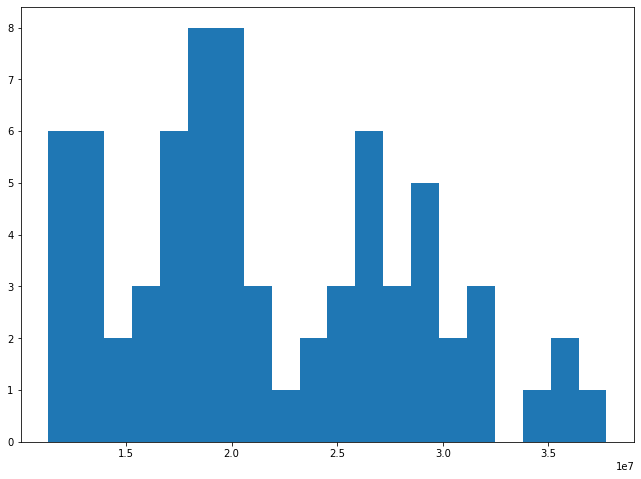

In [186]:
plt.hist(train_y, bins = 20)
plt.show()

In [187]:
collist_X = ['AVG_HH_SIZE','BPS_IND','DIVIND','MEDAGE','MEDDISINC_2018','PARKS_SQMI','PCAP_AFFH_NAICS',
           'PCAP_CAMPEQUIP','PCAP_CAMPFEES','PCAP_CC_DEBT','PCAP_CONTR_POL','PCAP_CONTR_RELIG','PCAP_HFEQUIP',
           'PCAP_RTS_NAICS','PCAP_WSEQUIP','PCT_ARCHERY','PCT_ATTEND_RELIG','PCT_BOAT','PCT_COUNTRY_PERF',
           'PCT_FFISH','PCT_GLBLWARM_WHATEVS','PCT_HH_ATV','PCT_HH_FOODSTAMPS','PCT_HH_TRUCK','PCT_HS_DIPLOMA',
           'PCT_HUNT_RIFLE','PCT_HUNT_SHOTGUN','PCT_KAYAK','PCT_MARRIED','PCT_NASCAR_SUPFAN','PCT_NOFOC_ENVIR',
           'PCT_SFISH','PCT_TARGET','PCT_WATCH_FISHING','PCT_WATCH_FOXNEWS','PCT_WATCH_NASCAR','PCT_WATCH_OUTDOOR',
           'PCT_WATCH_WWE','POPGRWTH','STORES_WITHIN_40MIN','TOTHH_2018','TOTPOP_2018','WATER_SQMI','STORE_SQFT']

#for var in collist_X:
    #name = var + '_cbrt'
    #train_X[name] = np.cbrt(train_X[var])
    #val_X[name] = np.cbrt(val_X[var])
    #test_X[name] = np.cbrt(test_X[var])
    #name = var + '_sq'
    #train_X[name] = np.power(train_X[var], 2)
    #val_X[name] = np.power(val_X[var], 2)
    #test_X[name] = np.power(test_X[var], 2)
    #name = var + '_log'
    #train_X[name] = np.log(train_X[var]+1)
    #val_X[name] = np.log(val_X[var]+1)
    #test_X[name] = np.log(test_X[var]+1)
    
collist_X_expanded = train_X.columns.values

collist_X_expanded = collist_X_expanded.tolist()

#imr = SimpleImputer(strategy='median')
#imr = imr.fit(train_X)

#train_X = pd.DataFrame(imr.transform(train_X.values), columns = collist_X)
#val_X = pd.DataFrame(imr.transform(val_X.values), columns = collist_X)
#test_X = pd.DataFrame(imr.transform(test_X.values), columns = collist_X)

#stdsc = StandardScaler()
#stdsc.fit(train_X)

#train_X = pd.DataFrame(stdsc.transform(train_X), columns = collist_X_expanded)
#val_X = pd.DataFrame(stdsc.transform(val_X), columns = collist_X_expanded)
#test_X = pd.DataFrame(stdsc.transform(test_X), columns = collist_X_expanded)




In [188]:
missing_df = train_X.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_X.shape[0]
missing_df.loc[missing_df['missing_ratio']>0.01]


,column_name,missing_count,missing_ratio


Anderson-Darling: 0.9238786552820528 Critical Value: 0.749 
train_y is not normally distributed


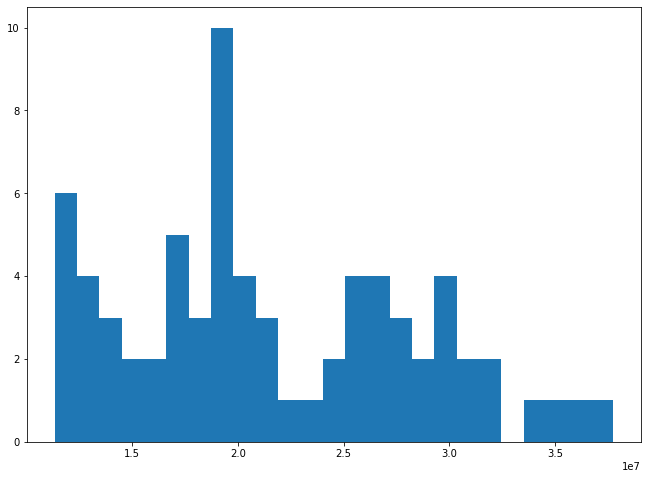

In [189]:
stat, cv, sig = stats.anderson(train_y, 'norm')
print('Anderson-Darling: {} Critical Value: {} '.format(stat, cv[2]))
if stat > cv[2]:
    print('train_y is not normally distributed')
else:
    print('train_y is normally distributed')
plt.hist(train_y, bins=25)
plt.show()

In [191]:
matplotlib.rcParams['figure.figsize'] = (5,2)

#collist_X_expanded.remove('VISITS_LT_sqrt')
#collist_X_expanded.remove('YOY_TREND_log')


train_X = train_X[collist_X_expanded]

collist_X_expanded = sorted(collist_X_expanded, key=str.lower)

varlist = []

for var in collist_X_expanded: 
    vardf = train_X[var]
    #print(vardf.head())
    coef, pval = stats.pearsonr(vardf.to_numpy(), train_y)
    if pval < 0.05:
        varlist.append(var)
        print('%50s Corr Coef: %7s - pval:  %.4f' % (var, str(round(coef,2)), pval))
    #plt.hist(train_X[var], bins = 100)
    #plt.show()
    
print(varlist)
    
matplotlib.rcParams['figure.figsize'] = (11,8)

                                    MEDDISINC_2018 Corr Coef:    0.32 - pval:  0.0059
                                   PCAP_AFFH_NAICS Corr Coef:   -0.25 - pval:  0.0348
                                    PCAP_CAMPEQUIP Corr Coef:    0.33 - pval:  0.0046
                                     PCAP_CAMPFEES Corr Coef:    0.29 - pval:  0.0132
                                      PCAP_CC_DEBT Corr Coef:     0.3 - pval:  0.0110
                                    PCAP_CONTR_POL Corr Coef:    0.37 - pval:  0.0017
                                  PCAP_CONTR_RELIG Corr Coef:    0.27 - pval:  0.0216
                                      PCAP_HFEQUIP Corr Coef:    0.24 - pval:  0.0455
                                      PCAP_WSEQUIP Corr Coef:    0.36 - pval:  0.0023
                                       PCT_ARCHERY Corr Coef:   -0.27 - pval:  0.0228
                                         PCT_FFISH Corr Coef:   -0.27 - pval:  0.0213
                                        PCT_HH_ATV Cor

In [193]:
collist_X_expanded = ['MEDDISINC_2018', 'PCAP_AFFH_NAICS', 'PCAP_CAMPEQUIP', 'PCAP_CAMPFEES', 'PCAP_CC_DEBT', 
                      'PCAP_CONTR_POL', 'PCAP_CONTR_RELIG', 'PCAP_HFEQUIP', 'PCAP_WSEQUIP', 'PCT_ARCHERY', 'PCT_FFISH', 
                      'PCT_HH_ATV', 'PCT_HH_FOODSTAMPS', 'PCT_HH_TRUCK', 'PCT_HUNT_RIFLE', 'PCT_HUNT_SHOTGUN', 'PCT_SFISH', 
                      'PCT_WATCH_FISHING', 'PCT_WATCH_NASCAR', 'PCT_WATCH_OUTDOOR', 'TOTHH_2018', 'TOTPOP_2018']
train_X = train_X[collist_X_expanded]

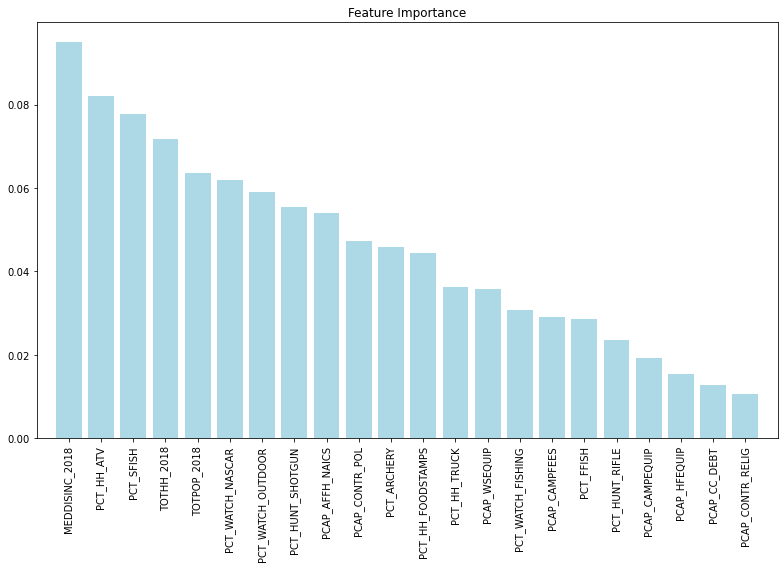

In [194]:
feat_labels = np.asarray(collist_X_expanded)

forests = RandomForestRegressor(n_estimators=500,
                                random_state=0,
                                n_jobs=-1)
forests.fit(train_X, train_y)
importances = forests.feature_importances_
indices = np.argsort(importances)[::-1]
# for f in range(train_X2.shape[1]):
#     print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]],
#                                       importances[indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(train_X.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(train_X.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, train_X.shape[1]])
plt.tight_layout()
plt.show()

In [195]:
slct = SelectKBest(f_regression, k=15)
slct.fit(train_X, train_y)
selected = slct.get_support()
feat_labels2 = feat_labels[selected]
feat_labels2

array(['MEDDISINC_2018', 'PCAP_CAMPEQUIP', 'PCAP_CAMPFEES',
       'PCAP_CC_DEBT', 'PCAP_CONTR_POL', 'PCAP_WSEQUIP', 'PCT_FFISH',
       'PCT_HH_ATV', 'PCT_HH_TRUCK', 'PCT_HUNT_RIFLE', 'PCT_SFISH',
       'PCT_WATCH_FISHING', 'PCT_WATCH_OUTDOOR', 'TOTHH_2018',
       'TOTPOP_2018'], dtype='<U17')

      VIF Factor            feature
1   11619.581578     PCAP_CAMPEQUIP
3   10407.657914       PCAP_CC_DEBT
9    2481.919149     PCT_HUNT_RIFLE
4    2143.095323     PCAP_CONTR_POL
5    2023.716417       PCAP_WSEQUIP
8    1346.153797       PCT_HH_TRUCK
12   1335.800364  PCT_WATCH_OUTDOOR
11   1233.674689  PCT_WATCH_FISHING
13   1134.530194         TOTHH_2018
14   1104.735275        TOTPOP_2018
2     947.828973      PCAP_CAMPFEES
0     946.288399     MEDDISINC_2018
6     934.378473          PCT_FFISH
10    579.262235          PCT_SFISH
7     440.800598         PCT_HH_ATV


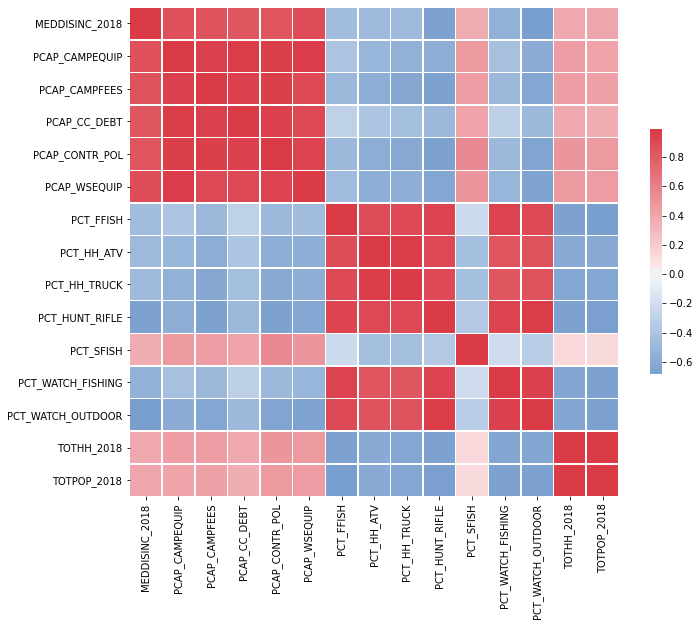

In [210]:
collist_X2 = [ 'MEDDISINC_2018', 'PCAP_CAMPEQUIP', 'PCAP_CAMPFEES',
       'PCAP_CC_DEBT', 'PCAP_CONTR_POL', 'PCAP_WSEQUIP', 'PCT_FFISH',
       'PCT_HH_ATV', 'PCT_HH_TRUCK', 'PCT_HUNT_RIFLE', 'PCT_SFISH',
       'PCT_WATCH_FISHING', 'PCT_WATCH_OUTDOOR', 'TOTHH_2018',
       'TOTPOP_2018']

#collist_X2 = feat_labels2.tolist()

train_X2 = train_X[collist_X2]
    
corr = train_X2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


print(helper.calc_VIFs(train_X2))

In [197]:
import statsmodels.api as sm

mod = sm.OLS(train_y, train_X2)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              66.31
Date:                Wed, 19 Aug 2020   Prob (F-statistic):                    4.83e-30
Time:                        17:10:59   Log-Likelihood:                         -1199.3
No. Observations:                  71   AIC:                                      2429.
Df Residuals:                      56   BIC:                                      2462.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [198]:
y_true3, y_pred3 = train_y, res.predict(train_X[collist_X2].values)
y_true, y_pred = val_y, res.predict(val_X[collist_X2].values)
y_true2, y_pred2 = test_y, res.predict(test_X[collist_X2].values)
print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
print('R2 Val: ' + str(r2_score(y_true, y_pred)))

R2 Train: 0.39794900949794276
R2 Val: 0.12423650353543614


In [199]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(train_X2.values, train_y)

train_y_pred = regr.predict(train_X2.values)
val_y_pred = regr.predict(val_X[collist_X2].values)
test_y_pred = regr.predict(test_X[collist_X2].values)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(val_y, val_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Train Coefficient of determination: %.2f'
      % r2_score(train_y, train_y_pred))
print('Val Coefficient of determination: %.2f'
      % r2_score(val_y, val_y_pred))
print('Test Coefficient of determination: %.2f'
      % r2_score(test_y, test_y_pred))

Coefficients: 
 [ 7.65136038e+02  6.35096070e+06 -2.99047002e+06  1.08099499e+05
 -3.96435383e+06 -3.68467638e+06 -2.81937320e+08  2.39629341e+08
 -4.55449807e+06 -1.46171807e+09  1.49143043e+09 -9.35717832e+08
  2.36352729e+09  6.43721835e+01 -2.17005590e+01]
Mean squared error: 33412672369238.79
Train Coefficient of determination: 0.40
Val Coefficient of determination: 0.16
Test Coefficient of determination: 0.03


In [242]:
param_test1 = {
     'learning_rate':uniform(0.01,0.09),
     'max_depth':list(range(5,20)),
     'min_child_weight':list(range(1,10)),
     'colsample_bytree': uniform(0.1,0.99),
     'subsample': uniform(0.1,0.99),
     'reg_alpha': uniform(0.1, 0.9),
     'reg_lambda': uniform(0.1, 0.9),
     'objective':['reg:squarederror'],
     'gamma':uniform(0.1, 5.0),
     'n_estimators':range(10,200,2),
     'booster':['gblinear'],
     #'booster':['gbtree'],
     'feature_selector':['cyclic','shuffle','random']
}


gsearch1 = RandomizedSearchCV(estimator = xgb.XGBRegressor(), 
                              param_distributions = param_test1, 
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              n_iter=1000,
                              cv=5)
start = time()
gsearch1.fit(train_X2.values, train_y)

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(gsearch1.cv_results_['params'])))

helper.report(gsearch1) 

Parameter search took 4.35 seconds for 1000 candidate parameter settings.
Best Mean validation score: -38755659100177.375 (std: nan)
Parameters: {'booster': 'gblinear', 'colsample_bytree': 0.8498494042917353, 'feature_selector': 'cyclic', 'gamma': 3.2046546551567485, 'learning_rate': 0.013650750761453168, 'max_depth': 16, 'min_child_weight': 7, 'n_estimators': 40, 'objective': 'reg:squarederror', 'reg_alpha': 0.21770651141351338, 'reg_lambda': 0.10909589748655171, 'subsample': 0.7815417002720546}


In [256]:


bestpar = gsearch1.best_params_

tuned_model = xgb.XGBRegressor( booster = bestpar['booster'],
                               colsample_bytree = bestpar['colsample_bytree'],
                               feature_selector = bestpar['feature_selector'],
                               gamma = bestpar['gamma'],
                               learning_rate = bestpar['learning_rate'],
                               max_depth = bestpar['max_depth'],
                               min_child_weight = bestpar['min_child_weight'],
                               n_estimators = bestpar['n_estimators'],
                               objective = bestpar['objective'],
                               reg_alpha = bestpar['reg_alpha'],
                               reg_lambda = bestpar['reg_lambda'],
                               subsample = bestpar['subsample'])

xgbmodel = tuned_model.fit(train_X2.values, train_y, 
                 eval_set=[(train_X2.values, train_y), (val_X[collist_X2].values, val_y), (test_X[collist_X2].values, test_y)], 
                 eval_metric='rmse',
                 early_stopping_rounds=10,                 
                 verbose=True)


[0]	validation_0-rmse:2.02912e+07	validation_1-rmse:1.85919e+07	validation_2-rmse:2.02756e+07
Multiple eval metrics have been passed: 'validation_2-rmse' will be used for early stopping.

Will train until validation_2-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:1.81846e+07	validation_1-rmse:1.66476e+07	validation_2-rmse:1.8062e+07
[2]	validation_0-rmse:1.63465e+07	validation_1-rmse:1.49534e+07	validation_2-rmse:1.61348e+07
[3]	validation_0-rmse:1.4748e+07	validation_1-rmse:1.34824e+07	validation_2-rmse:1.4464e+07
[4]	validation_0-rmse:1.33631e+07	validation_1-rmse:1.22107e+07	validation_2-rmse:1.30228e+07
[5]	validation_0-rmse:1.21687e+07	validation_1-rmse:1.1117e+07	validation_2-rmse:1.17874e+07
[6]	validation_0-rmse:1.11439e+07	validation_1-rmse:1.01817e+07	validation_2-rmse:1.07363e+07
[7]	validation_0-rmse:1.02698e+07	validation_1-rmse:9.38722e+06	validation_2-rmse:9.84966e+06
[8]	validation_0-rmse:9.52891e+06	validation_1-rmse:8.71722e+06	validation_2-rmse:9.10903e+06

In [245]:
model = xgb.XGBRegressor(n_estimators = 800, booster='gblinear', objective='reg:squarederror')

model.fit(train_X2.values, train_y,
        eval_set = [(val_X[collist_X2].values, val_y)],
        eval_metric='rmse',
        early_stopping_rounds=20,
        verbose=True
         )

[0]	validation_0-rmse:9.95954e+06
Will train until validation_0-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:6.63601e+06
[2]	validation_0-rmse:5.95136e+06
[3]	validation_0-rmse:5.85348e+06
[4]	validation_0-rmse:5.84627e+06
[5]	validation_0-rmse:5.84759e+06
[6]	validation_0-rmse:5.84752e+06
[7]	validation_0-rmse:5.84608e+06
[8]	validation_0-rmse:5.84401e+06
[9]	validation_0-rmse:5.84172e+06
[10]	validation_0-rmse:5.83938e+06
[11]	validation_0-rmse:5.83708e+06
[12]	validation_0-rmse:5.83483e+06
[13]	validation_0-rmse:5.83266e+06
[14]	validation_0-rmse:5.83055e+06
[15]	validation_0-rmse:5.82851e+06
[16]	validation_0-rmse:5.82654e+06
[17]	validation_0-rmse:5.82462e+06
[18]	validation_0-rmse:5.82276e+06
[19]	validation_0-rmse:5.82096e+06
[20]	validation_0-rmse:5.8192e+06
[21]	validation_0-rmse:5.8175e+06
[22]	validation_0-rmse:5.81584e+06
[23]	validation_0-rmse:5.81422e+06
[24]	validation_0-rmse:5.81264e+06
[25]	validation_0-rmse:5.8111e+06
[26]	validation_0-rmse:5.80959e+06
[27

[230]	validation_0-rmse:5.68822e+06
[231]	validation_0-rmse:5.68794e+06
[232]	validation_0-rmse:5.68766e+06
[233]	validation_0-rmse:5.68738e+06
[234]	validation_0-rmse:5.6871e+06
[235]	validation_0-rmse:5.68682e+06
[236]	validation_0-rmse:5.68655e+06
[237]	validation_0-rmse:5.68628e+06
[238]	validation_0-rmse:5.686e+06
[239]	validation_0-rmse:5.68573e+06
[240]	validation_0-rmse:5.68546e+06
[241]	validation_0-rmse:5.6852e+06
[242]	validation_0-rmse:5.68493e+06
[243]	validation_0-rmse:5.68467e+06
[244]	validation_0-rmse:5.68440e+06
[245]	validation_0-rmse:5.68414e+06
[246]	validation_0-rmse:5.68388e+06
[247]	validation_0-rmse:5.68363e+06
[248]	validation_0-rmse:5.68337e+06
[249]	validation_0-rmse:5.68311e+06
[250]	validation_0-rmse:5.68286e+06
[251]	validation_0-rmse:5.68261e+06
[252]	validation_0-rmse:5.68235e+06
[253]	validation_0-rmse:5.6821e+06
[254]	validation_0-rmse:5.68186e+06
[255]	validation_0-rmse:5.68161e+06
[256]	validation_0-rmse:5.68136e+06
[257]	validation_0-rmse:5.68112e+

[459]	validation_0-rmse:5.65074e+06
[460]	validation_0-rmse:5.65065e+06
[461]	validation_0-rmse:5.65057e+06
[462]	validation_0-rmse:5.65049e+06
[463]	validation_0-rmse:5.6504e+06
[464]	validation_0-rmse:5.65032e+06
[465]	validation_0-rmse:5.65024e+06
[466]	validation_0-rmse:5.65015e+06
[467]	validation_0-rmse:5.65007e+06
[468]	validation_0-rmse:5.64999e+06
[469]	validation_0-rmse:5.64991e+06
[470]	validation_0-rmse:5.64983e+06
[471]	validation_0-rmse:5.64975e+06
[472]	validation_0-rmse:5.64967e+06
[473]	validation_0-rmse:5.64959e+06
[474]	validation_0-rmse:5.64951e+06
[475]	validation_0-rmse:5.64943e+06
[476]	validation_0-rmse:5.64935e+06
[477]	validation_0-rmse:5.64928e+06
[478]	validation_0-rmse:5.6492e+06
[479]	validation_0-rmse:5.64912e+06
[480]	validation_0-rmse:5.64904e+06
[481]	validation_0-rmse:5.64897e+06
[482]	validation_0-rmse:5.64889e+06
[483]	validation_0-rmse:5.64882e+06
[484]	validation_0-rmse:5.64874e+06
[485]	validation_0-rmse:5.64867e+06
[486]	validation_0-rmse:5.6485

[688]	validation_0-rmse:5.6394e+06
[689]	validation_0-rmse:5.63938e+06
[690]	validation_0-rmse:5.63935e+06
[691]	validation_0-rmse:5.63933e+06
[692]	validation_0-rmse:5.6393e+06
[693]	validation_0-rmse:5.63928e+06
[694]	validation_0-rmse:5.63925e+06
[695]	validation_0-rmse:5.63923e+06
[696]	validation_0-rmse:5.63921e+06
[697]	validation_0-rmse:5.63918e+06
[698]	validation_0-rmse:5.63916e+06
[699]	validation_0-rmse:5.63914e+06
[700]	validation_0-rmse:5.63911e+06
[701]	validation_0-rmse:5.63909e+06
[702]	validation_0-rmse:5.63907e+06
[703]	validation_0-rmse:5.63904e+06
[704]	validation_0-rmse:5.63902e+06
[705]	validation_0-rmse:5.639e+06
[706]	validation_0-rmse:5.63898e+06
[707]	validation_0-rmse:5.63896e+06
[708]	validation_0-rmse:5.63893e+06
[709]	validation_0-rmse:5.63891e+06
[710]	validation_0-rmse:5.63889e+06
[711]	validation_0-rmse:5.63887e+06
[712]	validation_0-rmse:5.63885e+06
[713]	validation_0-rmse:5.63882e+06
[714]	validation_0-rmse:5.6388e+06
[715]	validation_0-rmse:5.63878e+

XGBRegressor(booster='gblinear', n_estimators=800, objective='reg:squarederror')

In [257]:
y_true, y_pred = train_y, xgbmodel.predict(train_X2.values, ntree_limit = 0)
                                         
r2 = r2_score(y_true, y_pred)                                  
r2

0.17897527933406643

In [258]:
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
#y_true3, y_pred3 = train_y, xgbmodel.predict(train_X[collist_X2].values, ntree_limit = xgbmodel.best_ntree_limit)
#y_true, y_pred = val_y, xgbmodel.predict(val_X[collist_X2].values, ntree_limit = xgbmodel.best_ntree_limit)
#y_true2, y_pred2 = test_y, xgbmodel.predict(test_X[collist_X2].values, ntree_limit = xgbmodel.best_ntree_limit)

y_true3, y_pred3 = train_y, xgbmodel.predict(train_X[collist_X2].values, ntree_limit = 0)
y_true, y_pred = val_y, xgbmodel.predict(val_X[collist_X2].values, ntree_limit = 0)
y_true2, y_pred2 = test_y, xgbmodel.predict(test_X[collist_X2].values, ntree_limit = 0)
print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
print('R2 Val: ' + str(r2_score(y_true, y_pred)))
print('R2 Test: ' + str(r2_score(y_true2, y_pred2)))

rmse = math.sqrt(mean_squared_error(y_true3, y_pred3))
print('RMSE Train: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE Val: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true2, y_pred2))
print('RMSE Test: ' + str(rmse))

rmse = mean_absolute_error(y_true3, y_pred3)
print('MAE Train: ' + str(rmse))
rmse = mean_absolute_error(y_true, y_pred)
print('MAE Val: ' + str(rmse))
rmse = mean_absolute_error(y_true2, y_pred2)
print('MAE Test: ' + str(rmse))

The model is trained on the full development set.
The scores are computed on the full evaluation set.

R2 Train: 0.17897527933406643
R2 Val: 0.15933636117045236
R2 Test: -0.0023569173252089293
RMSE Train: 6119885.050469524
RMSE Val: 5799686.672352167
RMSE Test: 6369304.336380526
MAE Train: 4809536.33512676
MAE Val: 4734857.190027778
MAE Test: 4986856.135749999


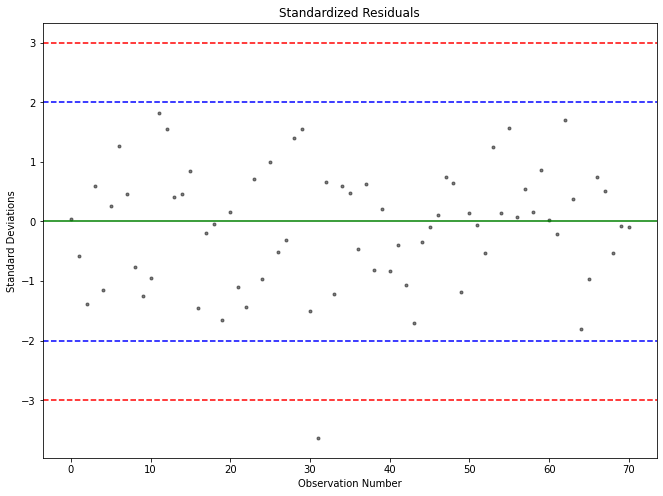

In [248]:
plotdata = pd.DataFrame({'true':y_true3.tolist(),'pred':y_pred3.tolist()})
plotdata['resid'] = plotdata['pred']-plotdata['true']
plotdata['stdresid'] = plotdata['resid']/np.std(plotdata['resid'])

plt.plot(plotdata['stdresid'], '.', alpha = 0.5, color='black')
plt.axhline(y=0, color = 'green')
plt.axhline(y=2, color = 'blue', linestyle='--')
plt.axhline(y=-2, color = 'blue', linestyle='--')
plt.axhline(y=3, color = 'red', linestyle='--')
plt.axhline(y=-3, color = 'red', linestyle='--')

plt.title('Standardized Residuals')
plt.ylabel('Standard Deviations')
plt.xlabel('Observation Number')
plt.show()

In [207]:
def un_cbrt(y_test, y_pred):
    '''
    Convert values back to actual dollar values.
    
    INPUTS:
        - y_test
        - y_predictions
    OUTPUT:
        - converted y_test
        - converted y_predictions
    '''
    return np.power(y_test,3), np.power(y_pred,3)




def get_prediction_interval(y_test, test_predictions, pi=.95):
    '''
    Get a prediction interval for a linear regression.
    
    INPUTS: 
        - Single prediction, 
        - y_test
        - All test set predictions,
        - Prediction interval threshold (default = .95) 
    OUTPUT: 
        - Prediction interval for single prediction
    '''
    
    #get standard deviation of y_test
    sum_errs = np.sum((y_test - test_predictions)**2)
    stdev = np.sqrt(1 / (len(y_test) - 2) * sum_errs)
#get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2)
    z_score = stats.norm.ppf(ppf_lookup)
    interval = z_score * stdev
#generate prediction interval lower and upper bound
    return interval

In [208]:
#y_true_conv, y_pred_conv = un_cbrt(y_true3, y_pred3)

get_prediction_interval(y_true3, y_pred3)

12182154.551807161

In [123]:
param_test2 = {
     'alpha':uniform(0.01,0.99),
     'l1_ratio':uniform(0.01,0.99),
     'fit_intercept':[True],
     'normalize':[True, False],
     'selection':['cyclic','random']
}


gsearch2 = RandomizedSearchCV(estimator = ElasticNet(), 
                              param_distributions = param_test2, 
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              n_iter=1000,
                              cv=5)
start = time()
gsearch2.fit(train_X2.values, train_y)

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(gsearch2.cv_results_['params'])))

helper.report(gsearch2) 

Parameter search took 1.81 seconds for 1000 candidate parameter settings.
Best Mean validation score: -600.260 (std: 70.626)
Parameters: {'alpha': 0.5524060279503249, 'fit_intercept': True, 'l1_ratio': 0.9647053600364013, 'normalize': False, 'selection': 'cyclic'}


In [142]:
tuned_net = ElasticNet(alpha = 0.8510,
                       l1_ratio = 0.9647)

enet_model = tuned_net.fit(train_X2.values, train_y)


In [143]:
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()

y_true3, y_pred3 = train_y, enet_model.predict(train_X[collist_X2].values)
y_true, y_pred = val_y, enet_model.predict(val_X[collist_X2].values)
y_true2, y_pred2 = test_y, enet_model.predict(test_X[collist_X2].values)
print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))

rmse = math.sqrt(mean_squared_error(y_true3, y_pred3))
print('RMSE Train: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE Val: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true2, y_pred2))
print('RMSE Test: ' + str(rmse))

rmse = mean_absolute_error(y_true3, y_pred3)
print('MAE Train: ' + str(rmse))
rmse = mean_absolute_error(y_true, y_pred)
print('MAE Val: ' + str(rmse))
rmse = mean_absolute_error(y_true2, y_pred2)
print('MAE Test: ' + str(rmse))

The model is trained on the full development set.
The scores are computed on the full evaluation set.

R2 Train: 0.3198335561851159
RMSE Train: 23.49964673865562
RMSE Val: 25.508964993928842
RMSE Test: 25.192010947622677
MAE Train: 18.95978588514798
MAE Val: 21.655442069937028
MAE Test: 21.051398021389787


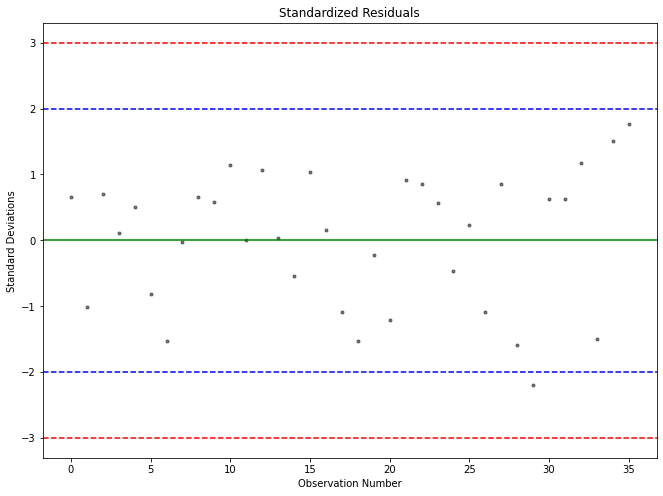

In [144]:
plotdata = pd.DataFrame({'true':y_true.tolist(),'pred':y_pred.tolist()})
plotdata['resid'] = plotdata['pred']-plotdata['true']
plotdata['stdresid'] = plotdata['resid']/np.std(plotdata['resid'])

plt.plot(plotdata['stdresid'], '.', alpha = 0.5, color='black')
plt.axhline(y=0, color = 'green')
plt.axhline(y=2, color = 'blue', linestyle='--')
plt.axhline(y=-2, color = 'blue', linestyle='--')
plt.axhline(y=3, color = 'red', linestyle='--')
plt.axhline(y=-3, color = 'red', linestyle='--')

plt.title('Standardized Residuals')
plt.ylabel('Standard Deviations')
plt.xlabel('Observation Number')
plt.show()

In [148]:
y_true_conv, y_pred_conv = un_cbrt(y_true3, y_pred3)

get_prediction_interval(y_true_conv, y_pred_conv)

10767209.562563062

In [149]:
enet_model.coef_

array([-2.61131869e-03,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        9.49591121e+00,  6.54021500e-01,  0.00000000e+00])